2023-03-21 08:14:37.475890: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-21 08:14:37.579996: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-21 08:14:37.580025: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-21 08:14:38.348297: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

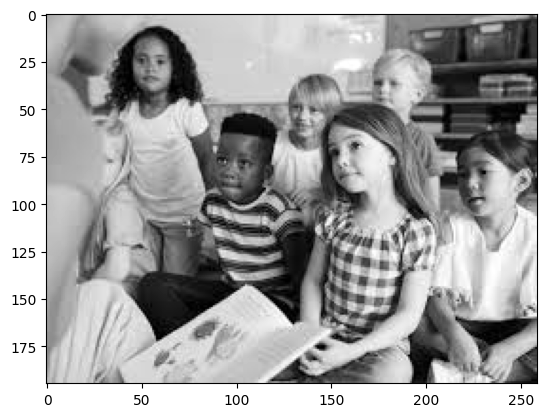

In [1]:
#libs
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

#data directories

DATADIR  = "/home/spidy/Documents/RJIT/PicData"
CATEGORIES = ["sfw", "nsfw"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to sfw and nfsw dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap ="gray")
        plt.show()
        break
    break

In [3]:
print (img_array).shape


[[168 169 171 ...  83 120 164]
 [168 170 172 ...  90 118 153]
 [170 171 173 ...  62  75  91]
 ...
 [179 185 189 ...  21  21  20]
 [179 185 189 ...   4   3   3]
 [179 185 189 ...  16  16  16]]


AttributeError: 'NoneType' object has no attribute 'shape'

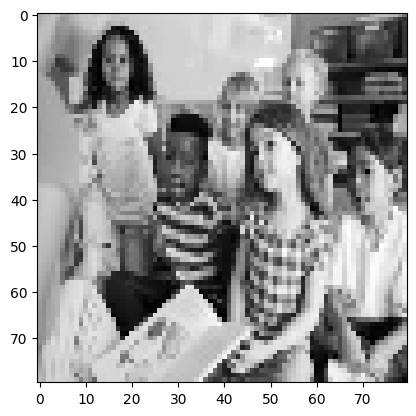

In [4]:
IMG_SIZE = 80
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show()

In [5]:
training_data = []
def create_training_data():
    for category in  CATEGORIES:
        path = os.path.join(DATADIR, category) #path to sfw and nsfw
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
        
create_training_data()

Corrupt JPEG data: premature end of data segment
Invalid SOS parameters for sequential JPEG
Invalid SOS parameters for sequential JPEG
Premature end of JPEG file
Invalid SOS parameters for sequential JPEG
Corrupt JPEG data: premature end of data segment


In [6]:
print(len(training_data))


9940


In [7]:
import random 
random.shuffle(training_data)


In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
0
1
0
0
0
1
1


In [9]:
X = []
y = []



In [10]:
for features, label in training_data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [11]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle", "rb")
X =  pickle.load(pickle_in)
                 

In [13]:
X[1]

array([[[255],
        [252],
        [252],
        ...,
        [254],
        [255],
        [253]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [254]],

       [[255],
        [255],
        [255],
        ...,
        [255],
        [255],
        [255]],

       ...,

       [[194],
        [193],
        [193],
        ...,
        [194],
        [195],
        [195]],

       [[194],
        [192],
        [194],
        ...,
        [196],
        [197],
        [195]],

       [[192],
        [190],
        [192],
        ...,
        [194],
        [196],
        [198]]], dtype=uint8)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle

X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("y.pickle", "rb"))

X = X/255.0
y = np.array(y)

model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", 
             optimizer="adam",
             metrics=['accuracy'])

model.fit(X, y, batch_size=8, epochs=10, validation_split=0.1)





Epoch 1/3


2023-03-21 08:22:03.360925: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 229017600 exceeds 10% of free system memory.


1119/1119 [==============================] - 73s 65ms/step - loss: 0.5466 - accuracy: 0.7114 - val_loss: 0.4768 - val_accuracy: 0.7918
Epoch 2/3
1119/1119 [==============================] - 74s 67ms/step - loss: 0.4296 - accuracy: 0.8028 - val_loss: 0.4671 - val_accuracy: 0.7958
Epoch 3/3
1119/1119 [==============================] - 71s 63ms/step - loss: 0.3604 - accuracy: 0.8375 - val_loss: 0.5606 - val_accuracy: 0.7797
